# Trabajo Eigenfaces

La tarea consiste en construir un algoritmo que aprenda una representación basado en eigenfaces.

Primero que todo vamos a utilizar un dataset de Scikit-Learn el cual contiene 13233 fotos de diferentes rostros, las cuales tienen unas dimensiones de 62 $\times$ 47 pixeles. 

In [1]:
#importamos todas las librerias necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
from sklearn import decomposition,svm
from PIL import Image
import cv2

Dimensiones de las imágenes: 62px X 47px
Este dataset contiene un total de: 13233 imágenes


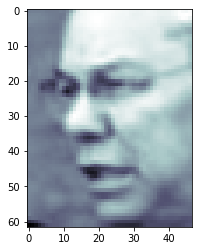

In [2]:
#Dataset de skLearn

faces = datasets.fetch_lfw_people()
face_dim = faces.images.shape

# Información del dataset
print('Dimensiones de las imágenes: {}px X {}px'.format(face_dim[1],face_dim[2]))
print('Este dataset contiene un total de: {} imágenes'.format(face_dim[0]))

# Sacamos un rostro para ver cómo reconstruir las imágenes 
# desde una matriz
data_faces = faces.data[1292].reshape(62,47)
imshow(np.asarray(data_faces),cmap=plt.cm.bone);

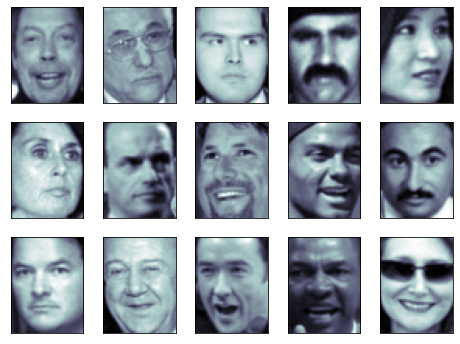

In [3]:
# Mostramos algunas imagenes de este dataset

fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)
  

## Reducción de dimencionalidad usando PCA

PCA significa Análisis de Componentes Principales, que es una técnica de reducción de dimensionalidad comúnmente utilizada en el análisis de datos y el aprendizaje automático. Su objetivo es transformar un conjunto de datos de alta dimensionalidad en un espacio de menor dimensión, al tiempo que se preserva la información o patrones más importantes en los datos.

Al aplicar PCA, obtendremos una matriz que representa la base de un "Espacio Vectorial de Caras" (también conocido como "Eigenfaces"). Esto significa que con los elementos de esta matriz podemos construir cualquier rostro como una combinación lineal de dichos elementos.

Es importante destacar que, a medida que aumentamos el número de componentes principales, disminuye la pérdida de detalles al representar un rostro como una combinación lineal. Por lo tanto, después de realizar experimentos, hemos decidido utilizar 300 componentes principales en este caso específico.

Ahora creemos nuestro conjunto de entrenamiento y prueba para PCA


In [4]:
# Creamos nuestro conjunto de entrenamiento y prueba para nuestro PCA

X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(9924, 2914) (3309, 2914)


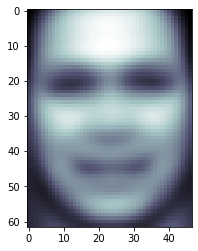

In [5]:
# Usamos PCA con nuestro dataset

pca = decomposition.PCA(n_components=300, whiten=True)
pca.fit(X_train)
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)

### Algunas eigenfaces

Ahora vamos a mostrar algunos elementos de la base que acabamos de construir. En este caso, vamos a presentar las primeras 30 eigenfaces.

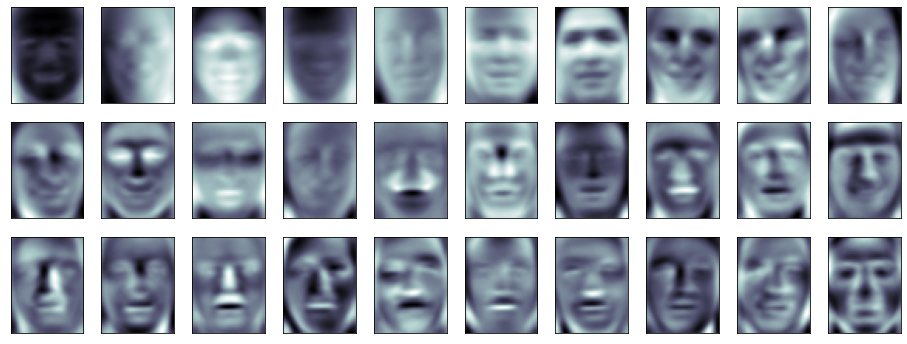

In [6]:
# Mostramos las primeras 30 eigenfaces contenidas en la matriz del PCA

fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

## Eigenfaces de rostro propio

Ahora algo más que se pidió en la tarea es ver cuales son las eigenfaces que mejor explican una imagen mia, entonces para esto primero hay que preprocesar la foto y ponerla con las mismas dimensiones y propiedades de las fotos del database:

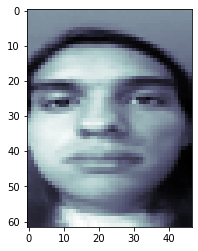

In [7]:
# Preprocesamiento de mi rostro
image = Image.open('pain.jpg').resize((47,62))
image_numpy = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2GRAY).flatten()

imshow(np.asarray(image_numpy.reshape(62,47)),cmap=plt.cm.bone);

En el siguiente código hacemos la proyección 

In [8]:
# Promedio de la base
mean_face = pca.mean_

# Diferencia entre el promedio de la base
# y el rostro que usamos
diff_face = image_numpy - mean_face

#Ahora hacemos la proyección del rostro en la base
projection = []
for i in range(300):
   projection.append(np.dot(diff_face, pca.components_[i]))
print('La proyección es:')
print(projection)

# Veamos qué elementos de la base tienen más peso
# en este caso sorted_base contiene un diccionario en donde el 
# las llaves son la posición de la eigenface en la base 
# y los valores son el respectivos pesos de la proyección
base_info = {i:abs(projection[i]) for i in range(0,len(projection)) }

# Ordenamos dicho diccionario y mostramos los 10 elementos que más peso tienen
sorted_base = {k: v for k, v in sorted(base_info.items(), 
                                      key=lambda item: item[1], 
                                      reverse=True)
               }

print("Las Eigenfaces con más pesos son:")
print(sorted_base)



La proyección es:
[334.92496, -1005.20734, 577.2404, -90.018456, 426.42953, -78.66859, -1076.3611, 53.198944, 27.260704, -372.12357, 194.5772, -198.54478, 170.9419, -274.51285, 312.12735, 205.30006, -222.84782, -253.996, -66.03167, 272.68033, -307.1632, 163.82779, -189.92493, 147.84782, 245.82953, 20.468029, 26.419935, -340.64624, -118.109604, -52.7588, 606.49524, -259.6222, -4.153496, -20.693794, 315.98135, -1.2128334, 14.952386, 55.960552, 2.8346605, -78.87665, 2.855351, -246.0339, 317.22638, -164.34764, 316.08893, -82.21595, -82.03793, 38.33089, 82.39772, -91.13643, 209.87685, -80.761955, -148.44296, -157.85663, 29.059265, 95.30622, -106.274185, -286.40887, 2.8718433, 168.57384, -80.469696, 49.77968, -156.64532, -58.564014, 93.32597, -186.1065, -101.890755, -59.076508, -89.6328, -69.40917, -32.96495, -227.72742, 2.6475892, -13.237074, -91.91256, 133.26796, -49.656128, 108.11702, 112.304306, 13.699076, -53.338055, 33.5993, -115.29532, 117.95893, 5.581399, 60.890663, -83.27625, 145.68

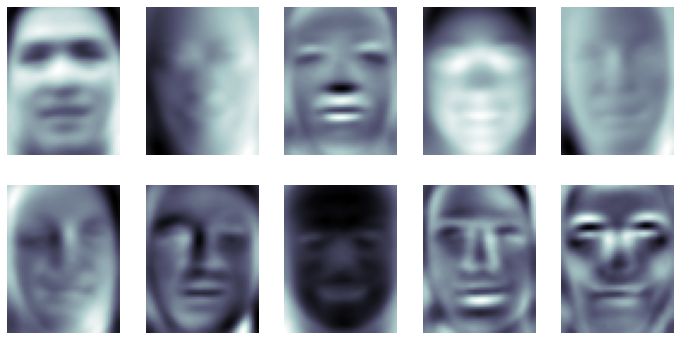

In [9]:
#Mostramos dichos elementos de la base
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
data = list(sorted_base.keys())[0:10]
for i in range(0,10):
  imagen = pca.components_[data[i]].reshape(faces.images[0].shape)
  axes[i // 5, i % 5].imshow(imagen, cmap=plt.cm.bone)
  axes[i // 5, i % 5].axis('off')  

## Reconstrucción con la base

Para mostrar que este método funciona, vamos a reconstruir la imagen anterior a partir de sus pesos.





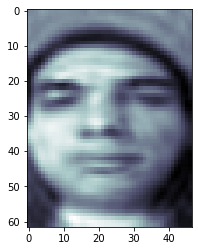

In [10]:
# Hacemos la reconstrucción con la proyección
for i in range(300):
  mean_face  = mean_face  + projection[i]*pca.components_[i]
imshow(mean_face.reshape(62,47),cmap=plt.cm.bone);

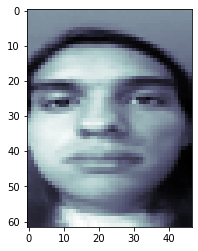

In [11]:
# La imágen original era 
imshow(np.asarray(image_numpy.reshape(62,47)),cmap=plt.cm.bone);

---

**Navegacion entre los Notebooks:**

Regresar a [Introducción de la tarea de Eigenfaces](Introducción_Tarea_Eigenfaces.ipynb)<br>

---

**Autores:** Alejandro Martin Salcedo.
